In [7]:
#https://www.kaggle.com/code/khotijahs1/k-nearest-neighbors-will-it-rain-tomorrow
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn import preprocessing

In [8]:
data = pd.read_csv('./datasets/weather_knn.csv')
print('Size of weather data frame is :',data.shape)
data.info()
data[0:10]
data.count().sort_values()

Size of weather data frame is : (923, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station                923 non-null    object 
 1   Date                   923 non-null    object 
 2   Tn                     923 non-null    float64
 3   Tx                     923 non-null    float64
 4   Tavg                   923 non-null    float64
 5   RR                     923 non-null    float64
 6   rainy_day              923 non-null    int64  
 7   It_will_rain_tomorrow  923 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 57.8+ KB


Station                  923
Date                     923
Tn                       923
Tx                       923
Tavg                     923
RR                       923
rainy_day                923
It_will_rain_tomorrow    923
dtype: int64

In [9]:
data = data.drop(columns=['Station','Date'],  axis=1)
data = data.dropna(how='any')
print(data.shape)

(923, 6)


In [10]:
print(data.shape)
data.head()

(923, 6)


,Tn,Tx,Tavg,RR,rainy_day,It_will_rain_tomorrow
0,20.3,31.1,25.8,108.0,1,1
1,25.0,31.8,29.2,106.0,1,1
2,23.4,29.6,25.8,100.6,1,1
3,23.6,28.0,25.6,93.9,1,1
4,21.1,29.4,25.5,93.0,1,1


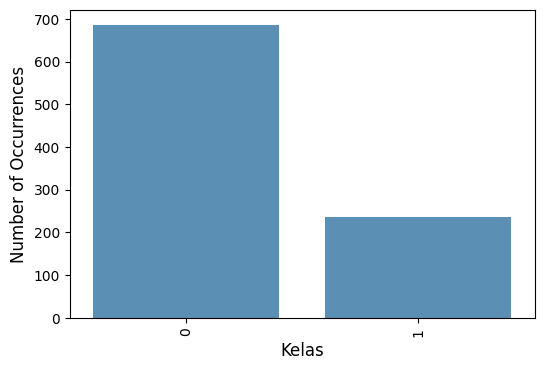

In [11]:
cnt_pro = data['It_will_rain_tomorrow'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Kelas', fontsize=12)
plt.xticks(rotation=90)
plt.show();


D:\personal\m-tech-bitspilani\m-tech-bitspilani\lectruers\First Semester\Machine Learning (S2-23_AIMLCZG565)\practise_code\my_env\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


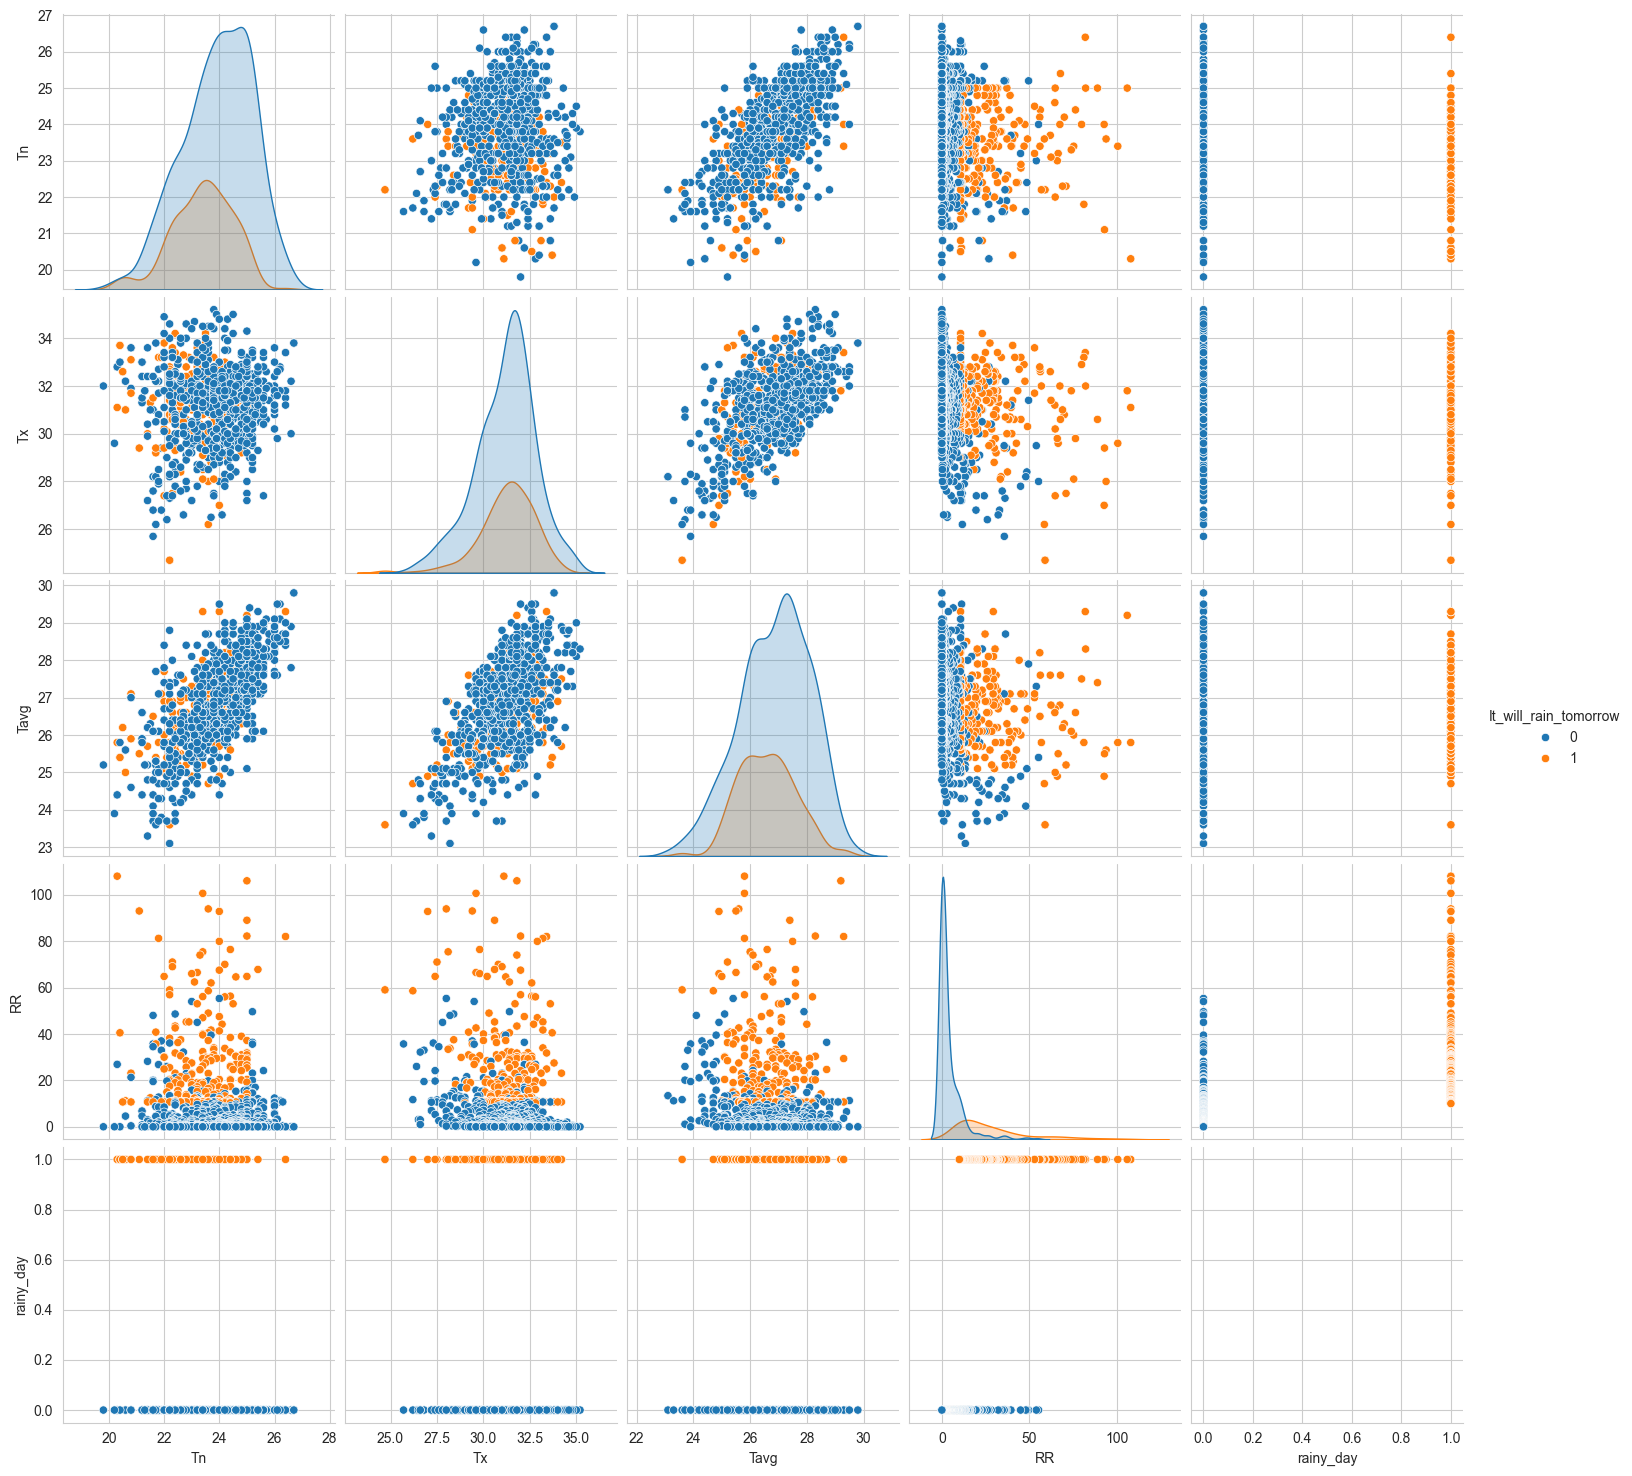

In [6]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="It_will_rain_tomorrow",size=3);
plt.show()

In [12]:
# Calculate the correlation matrix
corr = data.corr()
corr1 = pd.DataFrame(abs(corr['It_will_rain_tomorrow']),columns = ['It_will_rain_tomorrow','Tn','Tx','Tavg'])
nonvals = corr1.loc[corr1['It_will_rain_tomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

# We extract variables with correlation less than 0.5%
data1 = data.drop(columns=nonvals,axis=1)
print('Data Final',data1.shape)

Var correlation < 0.5% Empty DataFrame
Columns: [It_will_rain_tomorrow, Tn, Tx, Tavg]
Index: []
Data Final (923, 6)


<Axes: >

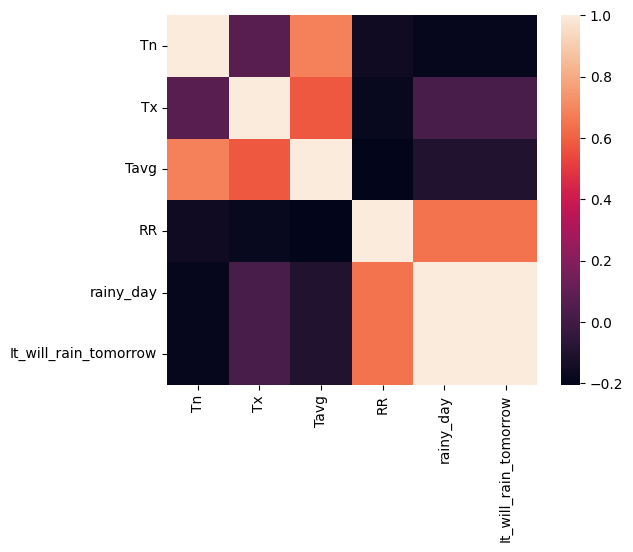

In [13]:
data = data[['Tn','Tx','Tavg','RR','rainy_day','It_will_rain_tomorrow']] #Subsetting the data
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [14]:
from sklearn.model_selection import train_test_split
Y = data1['It_will_rain_tomorrow']
X = data1.drop(columns=['It_will_rain_tomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [15]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (646, 5)
Y train shape:  (646,)
X test shape:  (277, 5)
Y test shape:  (277,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

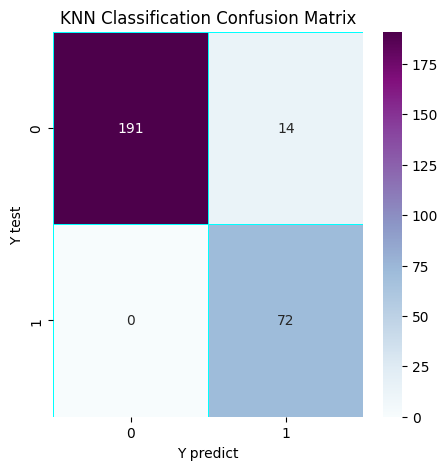

In [17]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [18]:
test_acc_knncla = round(knncla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_knncla = round(knncla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [19]:
#Accuracy
model1 = pd.DataFrame({
    'Model': ['KNN'],
    'Train Score': [train_acc_knncla],
    'Test Score': [test_acc_knncla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,KNN,97.68,94.95


In [20]:
#Precision, Recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.84


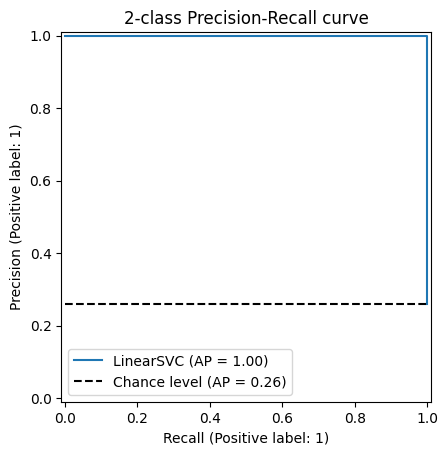

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=9))
classifier.fit(X_train, Y_train)
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, Y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")




In [27]:
Y1 = data['It_will_rain_tomorrow']
X1 = data.drop(columns=['It_will_rain_tomorrow','rainy_day'])

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.05, penalty="l1", dual=False,random_state=9).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Tn', 'Tx', 'RR']
3


D:\personal\m-tech-bitspilani\m-tech-bitspilani\lectruers\First Semester\Machine Learning (S2-23_AIMLCZG565)\practise_code\my_env\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\personal\m-tech-bitspilani\m-tech-bitspilani\lectruers\First Semester\Machine Learning (S2-23_AIMLCZG565)\practise_code\my_env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


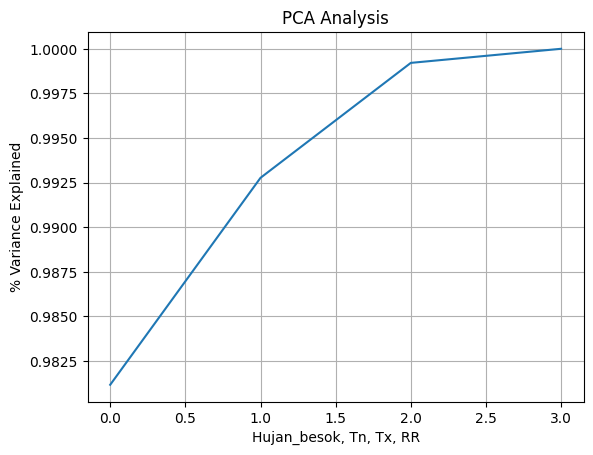

In [28]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Hujan_besok, Tn, Tx, RR')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [29]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1, 5))) 
print(variance[30:70])

Series([], dtype: float64)


In [30]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=9)

In [31]:
# K-Nearest Neighbor classification
knncla.fit(X1_train, Y1_train)
Y1_predict6 = knncla.predict(X1_test)
knncla_cm = confusion_matrix(Y1_test, Y1_predict6)
score1_knncla= knncla.score(X1_test, Y1_test)

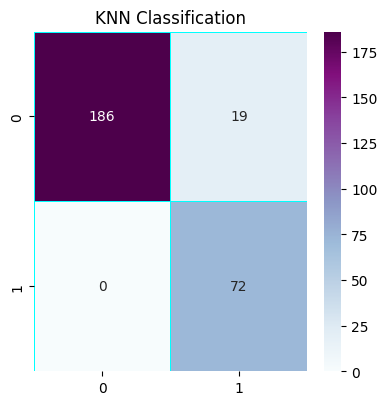

In [32]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('KNN Classification')
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="BuPu" ,fmt='g', ax=ax1)
plt.show()

In [33]:
Testscores1 = pd.Series([score1_knncla], index=[ 'K-Nearest Neighbour Score']) 
print(Testscores1)

K-Nearest Neighbour Score    0.931408
dtype: float64


In [34]:
#Precision, Recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y1_test, Y1_predict6)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.79
